# Mejorando la calidad de los Datos

### **Objetivos**

1. Solucionar valores faltantes en el dataset
2. Convertir la columna de caracteristicas "Date" a un formato datetime
3. Renombrar una columna de caracteristicas, remover un valor desde una columna de caracteristicas
4. Crear one-hot enconding features
5. Comprender conversiones temporales de caracteristicas.

- El objetivo principal para un Cientifico de Datos o un Ingeniero de Machine Learning es crear un modelo con la mayor y mejor  presición predictiva posible. Sin embargo. en la busqueda de un ajuste fino de los hiperparametros o de la mejora de los algoritmos de modelado, los datos podrían ser los culpables. 

- Analogamente se podria tomar un ejemplo, para hacer un buen trabajo, un artesano necesita las mejores herramientas. entonces, si los datos son generalmente de mala calidad, independientemente de lo bueno que sea un modelo de Machine Learning, los resultados siempre serán insatisfactorios en el mejor de los casos. 

- Teniendo todo lo anterior en mente, y sabiendo que los modelos de Machine Learning, solo pueden consumir datos numéricos y que los datos de este tipo deben ser unos y ceros. Se dice que los datos están "Desorganizados" o "Desordenados" cuando les faltan valores o atributos, contienen ruido o valores atípicos, tienen datos duplicados o encorrectos, incluyen nombres de columnas en mayúsculas o minúsculas y basicamente no están preparados para que un algoritmo de Machine Learning los transfiera.

- En este Micro-Proyecto, se presentará y solucionará algunos de los problemas más comunes de los datos "Desorganizados". 

---

### Comenzemos por instalar algunas librerias e importandolas

## Import Libraries

In [ ]:
# Instalar tensorFLow solo si no tienes instalado aún
# !pip install tensorflow    

In [59]:
import tensorflow as tf 

print("TensorFlow version: ", tf.version.VERSION)

TensorFlow version:  2.7.0


In [60]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Leer el Dataset dentro de un Pandas DataFrame

- Ahora vamos a leer el dataset que se tiene almacenado en el directorio

In [61]:
df_transport = pd.read_csv('untidy_vehicle_data.csv')

# Mostraremos las 5 primeras filas
df_transport.head()  

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


## Tipos de datos en las Columnas del DataFrame

- Ejecutar la siguiente celda para ver la información sobre el Dataframe

In [62]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        997 non-null    object 
 1   Zip Code    997 non-null    object 
 2   Model Year  997 non-null    object 
 3   Fuel        996 non-null    object 
 4   Make        996 non-null    object 
 5   Light_Duty  996 non-null    object 
 6   Vehicles    996 non-null    float64
dtypes: float64(1), object(6)
memory usage: 54.8+ KB


- Vamos a hacer un print de salida de las primeras 5 filas y las ultimas 5 filas de cada columna. Definitivamente ahora podemos ver mas de "string" object valor.

In [63]:
print(df_transport,100)

          Date Zip Code Model Year                      Fuel       Make  \
0    10/1/2018    90000       2006                  Gasoline  OTHER/UNK   
1    10/1/2018      NaN       2014                  Gasoline        NaN   
2          NaN    90000        NaN                  Gasoline  OTHER/UNK   
3    10/1/2018    90000       2017                  Gasoline  OTHER/UNK   
4    10/1/2018    90000      <2006  Diesel and Diesel Hybrid  OTHER/UNK   
..         ...      ...        ...                       ...        ...   
994   6/7/2019    90003       2012                  Gasoline     Type_R   
995   6/8/2019    90003       2012           Hybrid Gasoline  OTHER/UNK   
996   6/9/2019    90003       2012           Hybrid Gasoline     Type_Q   
997  6/10/2019    90003       2012               Natural Gas  OTHER/UNK   
998  6/11/2019    90003       2012            Plug-in Hybrid  OTHER/UNK   

    Light_Duty  Vehicles  
0          NaN       1.0  
1          Yes       1.0  
2          Yes    

--- 

## Resumen de las Estadisticas



In [64]:
df_transport.describe()

,Vehicles
count,996.000000
mean,72.878514
std,229.696895
min,1.000000
25%,13.000000
50%,23.000000
75%,57.250000
max,3178.000000


- Vamos a investigar un poco mas de nuestrps datos usando la función .groupby()

In [65]:
# Obtenemos la primera entrada para cada mes
df_transport.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001,2012,OTHER/UNK,Yes,1.0


--- 

## Comprobación de los valores faltantes

- Estos valores faltantes impactan negativamente en la calidad de los datos, ya que podrian llevar al modelo de Machine Learning a hacer inferencias inexactas sobre los datos.

- Mostraremos los valoeres nulos para todas las caracteristicas en el DAtaframe

In [66]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          3
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

- Para ver una muestra de los valores que falta, ingresaremos el nombre de cada columna. Debe notar que "False" y "True" corresponden a la presencia o ausencia de un valor por número de índice.

In [67]:
print(df_transport['Date'])
print(df_transport['Date'].isnull())

0      10/1/2018
1      10/1/2018
2            NaN
3      10/1/2018
4      10/1/2018
         ...    
994     6/7/2019
995     6/8/2019
996     6/9/2019
997    6/10/2019
998    6/11/2019
Name: Date, Length: 999, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Date, Length: 999, dtype: bool


In [68]:
print(df_transport['Make'])
print(df_transport['Make'].isnull())

0      OTHER/UNK
1            NaN
2      OTHER/UNK
3      OTHER/UNK
4      OTHER/UNK
         ...    
994       Type_R
995    OTHER/UNK
996       Type_Q
997    OTHER/UNK
998    OTHER/UNK
Name: Make, Length: 999, dtype: object
0      False
1       True
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Make, Length: 999, dtype: bool


In [69]:
print(df_transport['Model Year'])
print(df_transport['Model Year'].isnull())

0       2006
1       2014
2        NaN
3       2017
4      <2006
       ...  
994     2012
995     2012
996     2012
997     2012
998     2012
Name: Model Year, Length: 999, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Model Year, Length: 999, dtype: bool


---

## ¿Que Podemos deducir sobre los datos en este Momento?

- Primer, resumamos nuestros datos por fila, columna, caracteristica, valores unicos y valores faltantes.

In [70]:
print("Rows         : ", df_transport.shape[0])
print("Columns      : ", df_transport.shape[1])
print("\nFeatures   : \n", df_transport.columns.tolist())
print("\nUnique values :   \n ", df_transport.nunique())
print("\nMissing values : ", df_transport.isnull().sum().values.sum())

Rows         :  999
Columns      :  7

Features   : 
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Unique values :   
  Date          248
Zip Code        6
Model Year     15
Fuel            8
Make           43
Light_Duty      3
Vehicles      210
dtype: int64

Missing values :  18


- Veamos los datos nuevamente, esta vez las ultimas cinco filas del conjunto de datos.

In [71]:
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
994,6/7/2019,90003,2012,Gasoline,Type_R,Yes,26.0
995,6/8/2019,90003,2012,Hybrid Gasoline,OTHER/UNK,Yes,4.0
996,6/9/2019,90003,2012,Hybrid Gasoline,Type_Q,Yes,25.0
997,6/10/2019,90003,2012,Natural Gas,OTHER/UNK,Yes,1.0
998,6/11/2019,90003,2012,Plug-in Hybrid,OTHER/UNK,Yes,3.0


--- 

## ¿Cuáles son nuestros problemas de Calidad de Datos ? 

1. **Problema de Calidad de Datos #1**:
>  **Valores Faltantes:**  Cada  columna de caracteristicas tiene varios valores faltantes. De hecho, tenemos un total de 18 valores faltantes.

2. **Problema de Calidad de Datos #2**:
>  **Tipos de datos de la columna "Date" : ** La fecha se muestra como un tipo de datos de tipo "objeto" y debe ser un datetime. Además, la fecha esta en una columna. Muestro requisito comercial es ver la fecha analizada en año, mes y día.

3. **Problema de Calidad de Datos #3**:
>  **Año del modelo:**  SOlo nos interesan los años superiores a 2006, no "<2006".

4. **Problema de Calidad de Datos #4**:
>  **Columnas categoricas:**  la columna de caracteristicas "Light Duty" es categorica y tiene una opcion "SI / No". No podemos introducir valores como este en un modelo de machine Learning. Ademas, necesitamos "codificar one-hot las columnas restantes "string/" "object".

5. **Problema de Calidad de Datos #5**:
>  **Caracteristicas Temporaless:**  ¿Cómo manejamos año, mes y dia?


---
---
## PROBLEMA DE CALIDAD DE DATOS #1:

### Resolviendo Valores Faltantes:


- La mayoria de los algoritmos no aceptan valores faltantes. Sin embargo, cuando vemos valores faltantes en nuestro dataset, siempre hay una tendencia a "eliminar todas las filas" que tengan valores faltantes. Aunque Pandas llenará el espacio en blanco con "NaN", deberiamos "manejarlos" de alguna manera.

- Si bien todos los métodos para manejar los valores faltantes están más alla del alcance de este notebook, existen algunos métodos que debe considerarse. para columnas numéricas, use los valores "medios" para completar los valores numéricos faltantes. Para columnas categóricas use el "modo" (o los valores más frecuentes) para completar los valores categoricos faltantes.

- En este Notebook, usamos las funciones .apply() y lambda para llenar cada columna con su propio valor más frecuente. 

- Revisemos nuevamente los valores faltantes mostrando cuantas filas contienen valores NaN para cada columna de características.

- **Verificar los valores faltantes mostrando cuantas filas contiene valores NaN para cada columna de caracteristicas**


In [72]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          3
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

- Aplicar la funcion lambda. Podemos usar la funcion apply() para aplicar la funcion labmda tanto a filas como a columnas en un DataFrame

In [73]:
df_transport = df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

- Revisar nuevamente los valores faltantes

In [74]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

---
---
## PROBLEMA DE CALIDAD DE DATOS #2:

### Convertir la Columna de caracteristicas DATE a un formato datetime:


- Convertir el tipo de datos datetime con la funcion to_datetime() en Pandas.


In [75]:
df_transport['Date'] = pd.to_datetime(df_transport['Date'], format='%m/%d/%Y')

- Mostrar los Datos convertidos

In [76]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        999 non-null    datetime64[ns]
 1   Zip Code    999 non-null    object        
 2   Model Year  999 non-null    object        
 3   Fuel        999 non-null    object        
 4   Make        999 non-null    object        
 5   Light_Duty  999 non-null    object        
 6   Vehicles    999 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 54.8+ KB


- Analizamos la característica "Date" en tres columnas por Ej. año, mes y dia

In [77]:
df_transport['year'] = df_transport['Date'].dt.year
df_transport['month'] = df_transport['Date'].dt.month
df_transport['day'] = df_transport['Date'].dt.day

#Si la columna tambien contara con fecha y hora podriamos hacer lo siguiente:

#df['hour'] = df['date'].dt.hour   --> Podriamos hacer esto si la columna Date incluye el formato hora
#df['minute'] = df['date'].dt.minute   ---> podriamos hacer esto si la columna Date incluye formato minutos

df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        999 non-null    datetime64[ns]
 1   Zip Code    999 non-null    object        
 2   Model Year  999 non-null    object        
 3   Fuel        999 non-null    object        
 4   Make        999 non-null    object        
 5   Light_Duty  999 non-null    object        
 6   Vehicles    999 non-null    float64       
 7   year        999 non-null    int64         
 8   month       999 non-null    int64         
 9   day         999 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 78.2+ KB


- A continuación, confirmemos el analisis de la Columna Date. Esto tambien nos dará otra visualizacion de los datos

- Aquí,estamos creando un nuevo DataFrame llamado "grouped_data" y agrupando en la columna "Make"

- Y obtenemos la prumera entrada para cada mes.

In [78]:
grouped_data = df_transport.groupby(['Make'])

# Obtener la primera entrada para cada mes

df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001,2018,Gasoline,Type_C,Yes,32.0,2019,1
4,2019-04-01,90003,2006,Gasoline,Type_U,Yes,13.0,2019,1
5,2019-05-01,90003,2007,Gasoline,Type_GG,Yes,13.0,2019,1
6,2019-06-01,90003,2008,Gasoline,Type_J,Yes,15.0,2019,1
7,2019-07-01,90003,2009,Gasoline,Type_J,Yes,141.0,2019,1
10,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001,2007,Gasoline,Type_M,Yes,15.0,2018,1


- Ahora que tenemos las fechas como numero enteros, hagamos un trazado adicional.

Text(0.5, 1.0, 'Vehicles by Momth')

<Figure size 720x432 with 0 Axes>

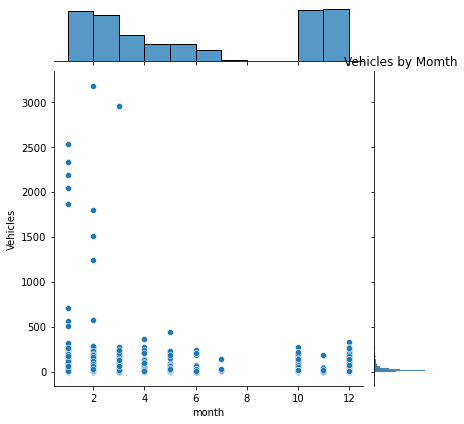

In [79]:
plt.figure(figsize=(10,6))
sns.jointplot(x='month', y='Vehicles', data=df_transport)
plt.title('Vehicles by Momth')

---
---
## PROBLEMA DE CALIDAD DE DATOS #3:

### Renombrar una columna caracteristica y remover un valor:

- Nuestras columnas de Caracteristicas tienen diferentes "Mayúsculas" en sus nombres . p. Ej "mayúsculas y minúsculas". Ademas hay "espacios" en algunos de los nomrbres de las columnas. Además, solo estamos interesados en años superiores a 2006. no "<2006"

- **Remover todos los espacios de las columnas caracteristicas cambiandolas a nombres.**

In [80]:
df_transport.rename(columns = { 'Date': 'date', 'Zip Code': 'zipcode', 'Model Year': 'modelyear', 'Fuel': 'fuel', 'Make':'make', 'Light_Duty': 'lightduty', 'Vehicles': 'vehicles'}, inplace=True)

# vemos las salidas de las dos primeras filas

df_transport.head(2)

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1


**Nota**: A continuacion, creamos una copia del DataFrame para evitar la advertencia "SettingWithCopyWarning: Se está intentando establecer un valor en una copia de un segmento de un Dataframe". Ejecute la cela para eliminar el valor "<2006" de la columna de caracteristicas "modelyear"

- **Crear una copia de el DataFrame para evitar problemas de advertencia de copia**

In [81]:
df = df_transport.loc[df_transport.modelyear != '<2006'].copy()

- A continuacion, confirmamos, que el valor de la colkumna 'modelyear' '<2006' se ha eliminado haciendo un recuento de valores.

In [82]:
df['modelyear'].value_counts(0)

2007    87
2012    81
2008    79
2011    77
2010    71
2006    70
2015    61
2014    59
2017    57
2016    57
2009    53
2013    52
2018    42
2019     6
Name: modelyear, dtype: int64

---
---
## PROBLEMA DE CALIDAD DE DATOS #4:

### Manejo de las columnas categóricas.

- La columna de caracteristicas: 'lightduty' es categorica y tiene opciones "Yes/No". no podemos introducir valores como este en un modelo de Machine Learning. 

- Necesitamos vonvertir las respuestas binarias de cadenas de "Yes/NO" a enteros "1/0". Existen varios métodos para lograrlo. Usaremos el método .apply() con una expresion lambda. Pandas.apply() toma una funcion y la aplica a todos los valores de una serie Pandas.

--- 

**¿Qué es una Función Lambda?**

- Normalmente, Python requiere que defina una función usando la palabra clave "def". Sin embargo, las funciones lambda son anónimas -- lo que significa que no es necesario nombrarlas. El caso de uso más común para las funciones lambda está en el codigo que requiere una función simple de una línea( por ejemplo, las lambdas solo tienen una expresión)

- Primero, hacemos un recuento de el numero de veces de  "Yes" y "No" en la columna de la caracteristica "lightduty".


In [83]:
df['lightduty'].value_counts(0)

Yes    771
No      80
--       1
Name: lightduty, dtype: int64

- Ahora convertimos el "Yes" en "1" y el "No" en "0". "Pandas.apply()".apply toma una funcion y la aplica a todos los valores de una serie Pandas (por ejemplo: lightduty)

In [84]:
df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if x == 'No' else 1)
df['lightduty'].value_counts(0)

1    772
0     80
Name: lightduty, dtype: int64

- Confirmamos que la columna "lightduty" ha sido convertida.

In [85]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1
16,2018-10-09,90001,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9
17,2018-10-10,90001,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10


## One-Hot Encoding categorical Feature Columns

- Los algoritmos de Machine Learning esperan vectores de entrada y no caracteristicas categoricas. Especificamente, no pueden manejar valores de texto o cadenas. por lo tanto, a menudoes util transformar caracteristicas categoricas en vectores. 

- Un método de transformación es crear variables ficticias para nuestras caracteristicas categoricas. Las variables ficticias son un conjunto de variables binarias (0 o 1) que representan una sola clase de una caracteristica categorica. Simplemente codificamos la variable categorica como un vector One-hot, es decir, un vector donde solo un elemento es distinto de cero o hot. Con la codificación one-hot, una caracteristica categorica se convierte en una matriz cuyo tamaño es el numero de opciones posibles para esta caracteristica.

- Pandas proporciona una funcion llamada "get_dummies" para convertir una variable categorica en variables ficticias o indicadoras. Es la funcion que usaremos para nuestro propósito de cambiar las variables categoricas. 

In [87]:
data_dummy = pd.get_dummies(df[['zipcode', 'modelyear', 'fuel', 'make']], drop_first=True)
data_dummy.head()

,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_9001,zipcode_na,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **Fusionar (concatenar) el DataFrame original con el DataFrame ficticio**

In [88]:
df = pd.concat([df, data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


- **Eliminar los atributos para los que creamos variables ficticias**

In [89]:
df = df.drop(['date', 'zipcode','modelyear','fuel', 'make'], axis=1)

- Confirmar que 'zipcode', 'modelyear','fuel', 'make' han sido eliminados

In [91]:
df.head()

,lightduty,vehicles,year,month,day,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_9001,zipcode_na,...,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z
0,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2018,10,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,2018,10,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,2018,10,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
---
## PROBLEMA DE CALIDAD DE DATOS #5:

### Columnas de caracteristicas temporales.

- Nuestro conjunto de datos ahora contiene columnas de caracteristicas de año, mes y dia. Convirtamos las columnas de caracteristicas de mes y dia en representaciones significativas como una forma de hacernos pensar en cambiar las caracteristicas temporales, ya que a veces se pasan por alto. 

- Primero, imprimimos los valores únicos para 'mes' y 'dia' en nuestro conjunto de datos.

In [93]:
print('unique values of month: ', df.month.unique())
print('unique values of day: ', df.day.unique())
print('unique values of year: ', df.year.unique())

unique values of month:  [10 11 12  1  2  3  4  5  6  7]
unique values of day:  [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
unique values of year:  [2018 2019]


- A continuacion, asignamos cada variable temporal a un circulo de modo que el valor más bajo para esa variable aparezca justo al lado del valor mas grande. Calculamos el componente x y y de ese punto usando funciones trigonometricas sin y cos. 

- No se preocupe, esta es la ultima ves que usaremos este código, ya que puede desarrollar una canalizacion de entrada para abordar estas columnas de caracteristicas temporales de TensorFlow y Keras, !es mucho más fácil! 

- Ejecute la celda para ver la salida.
 

In [94]:
df['day_sin'] = np.sin(df.day*(2.*np.pi/31))
df['day_cos'] = np.cos(df.day*(2.*np.pi/31))
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_sin'] = np.cos((df.month-1)*(2.*np.pi/12))

df = df.drop(['month', 'day', 'year'], axis=1)

- Desplácese hacia la derecha para ver las columnas de mes y dia convertidas.

In [95]:
df.tail(4)

,lightduty,vehicles,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_9001,zipcode_na,modelyear_2007,modelyear_2008,modelyear_2009,...,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z,day_sin,day_cos,month_sin
995,1,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.998717,-0.050649,-0.866025
996,1,25.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.968077,-0.250653,-0.866025
997,1,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.897805,-0.440394,-0.866025
998,1,3.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.790776,-0.612106,-0.866025


## Conclusión:

- Este cuaderno introdujo algunos conceptos para mejorar la calidad de los datos. Resolvimos los valores faltantes, convertimos la columna de caracteristicas de Date a un formato de datetime, cambiamos el nombre de las columnas de caracteristicas, eliminamos un valorde una columna de caracteristicas, creamos caracteristicas de codificacion únicas y convertimos caracteristicas temporales, en representaciones significativas. Al final de nuestro notebook, comprendimos porque los datos debe " limpiarse"  y " procesarse previamente " antes de engresarlos en un modelo de Machine Learning. 